In [141]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [142]:
#opening file
filepath = r"loan_approval_dataset.csv"

df = pd.read_csv(filepath,  sep= ',')

#### Exploratory data analysis

##### Trying to learn more about the dataset and get to be familiar with it.

In [143]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [144]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [145]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [146]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [148]:
df.shape

(4269, 13)

In [149]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [150]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [151]:
df.set_index('loan_id', inplace = True)

In [152]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [153]:
print(df.columns.tolist())

[' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [154]:
# Apply the strip function to all column names
df.columns = df.columns.str.strip()

In [155]:
df['loan_status'].value_counts()

loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64

In [156]:
df.ndim

2

In [157]:
df.rename(columns={'cibil_score' : 'credit_score'}, inplace = True)

In [158]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected


In [159]:
df.duplicated().sum()

0

In [160]:
df.shape

(4269, 12)

In [161]:
# Save cleaned dataset for BI
df.to_csv("loan_data_ready.csv", index=False)

### Moving into visualisations

In [21]:
# Checking available style formats

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [22]:
#Selecting a style format

plt.style.use('Solarize_Light2')

In [23]:
status_count = df['loan_status'].value_counts()

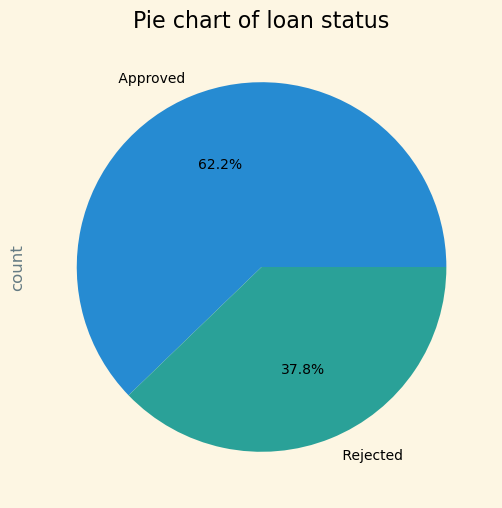

In [24]:
status_count.plot(kind = 'pie',
                 title = 'Pie chart of loan status',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

In [25]:
education_count = df['education'].value_counts()

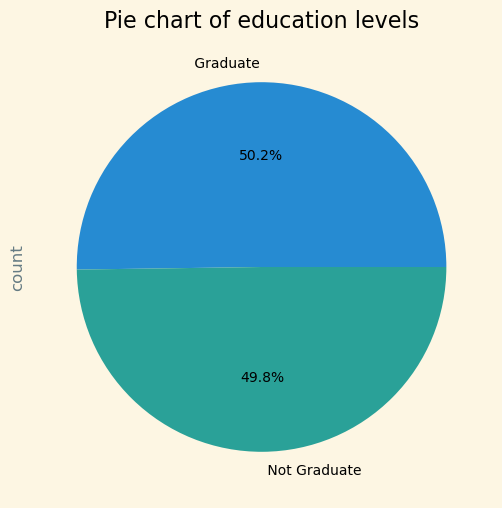

In [26]:
education_count.plot(kind = 'pie',
                 title = 'Pie chart of education levels',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

In [27]:
df['education'] = df['education'].str.strip()

In [28]:
### Converting eduation status to a boolean 
## Do not run this more than once 
df['education'] = df['education'].apply(lambda x: 1 if x == 'Graduate'  else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,0,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,1,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,1,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,0,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [31]:
self_emp_count = df['self_employed'].value_counts()

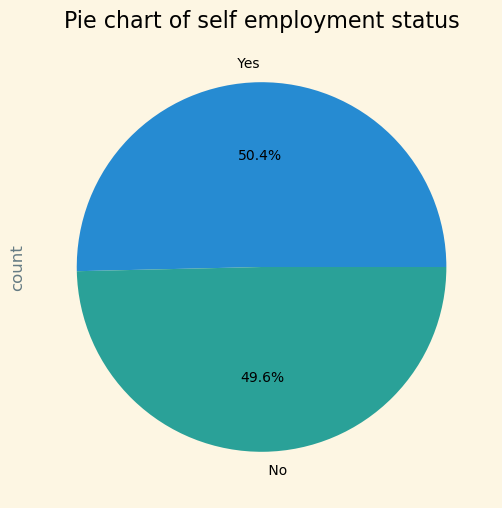

In [32]:
self_emp_count.plot(kind = 'pie',
                 title = 'Pie chart of self employment status',
                 figsize = (10, 6),
                 autopct = '%1.1f%%');

In [33]:
df['self_employed'] = df['self_employed'].str.strip()

In [34]:
df['self_employed'] = df['self_employed'].apply(lambda x: 1 if x == 'Yes'  else 0)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [27]:
rate = df.groupby(['no_of_dependents', 'loan_status']).size().unstack()
rate

loan_status,Approved,Rejected
no_of_dependents,,
0,457,255
1,430,267
2,441,267
3,457,270
4,465,287
5,406,267


In [28]:
dep_counts = df['no_of_dependents'].value_counts().sort_index()

In [29]:
rate_percent = rate.div(rate.sum(axis=1), axis=0) * 100

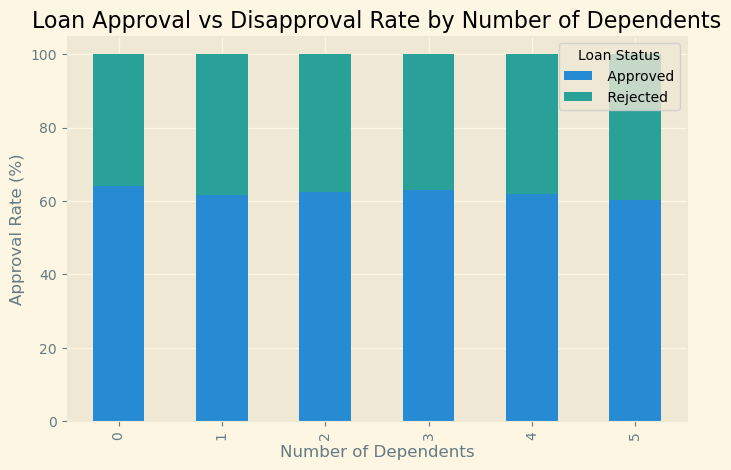

In [30]:
rate_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.xlabel("Number of Dependents")
plt.ylabel("Approval Rate (%)")
plt.title("Loan Approval vs Disapproval Rate by Number of Dependents")
plt.legend(title="Loan Status")
plt.show()


<Axes: >

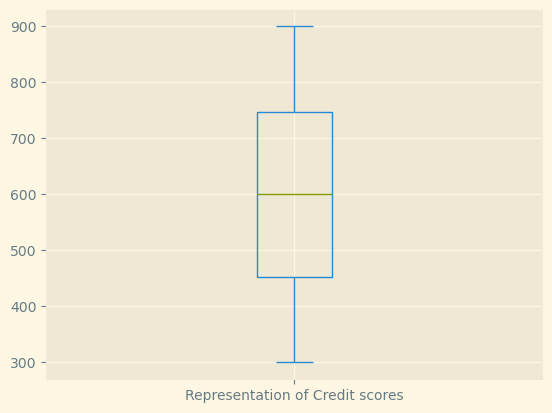

In [34]:
df['credit_score'].plot(
    kind = "box",
    label = "Representation of Credit scores"
)

## Applying Logistics Regression

#### Splitting test and train sets

In [35]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [36]:
X = df.drop('loan_status', axis = 1)

In [37]:
X

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000


In [38]:
df['loan_status'] = df['loan_status'].str.strip()

In [39]:
Y = df['loan_status'].apply(lambda x: 1 if x == 'Approved'  else 0)
Y.head()

loan_id
1    1
2    0
3    0
4    0
5    0
Name: loan_status, dtype: int64

In [40]:
df['income_annum'].unique()

array([9600000, 4100000, 9100000, 8200000, 9800000, 4800000, 8700000,
       5700000,  800000, 1100000, 2900000, 6700000, 5000000, 1900000,
       4700000,  500000, 2700000, 6300000, 5800000, 6500000, 4900000,
       3100000, 2400000, 7000000, 9000000, 8400000, 1700000, 1600000,
       8000000, 3600000, 1500000, 7800000, 1400000, 4200000, 5500000,
       9500000, 7300000, 3800000, 5100000, 4300000, 9300000, 7400000,
       8500000, 8800000, 3300000, 3900000, 8300000, 5600000, 5300000,
       2600000,  700000, 3500000, 9900000, 3000000, 6800000, 2000000,
       1000000,  300000, 6600000, 9400000, 4400000,  400000, 6200000,
       9700000, 7100000,  600000, 7200000,  900000,  200000, 1800000,
       4600000, 2200000, 2500000, 8600000, 4000000, 5200000, 8900000,
       1300000, 4500000, 8100000, 9200000, 2800000, 7500000, 6400000,
       6900000, 7700000, 3200000, 7900000, 5900000, 3400000, 2100000,
       3700000, 5400000, 2300000, 7600000, 6000000, 6100000, 1200000],
      dtype=int64)

<Axes: xlabel='loan_status'>

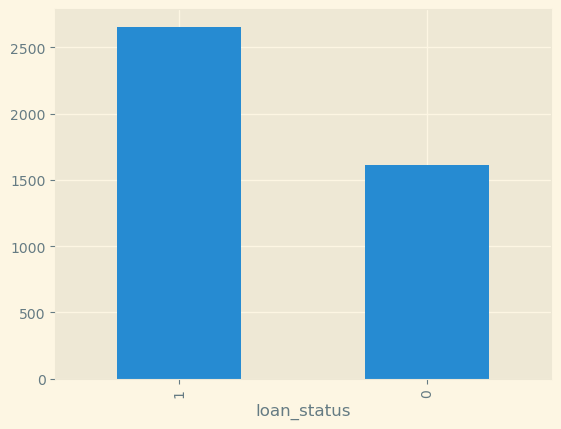

In [44]:
Y.value_counts().plot(
    kind = 'bar'
)

In [47]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_resampled, Y_resampled, = smote.fit_resample(X,Y)

<Axes: xlabel='loan_status'>

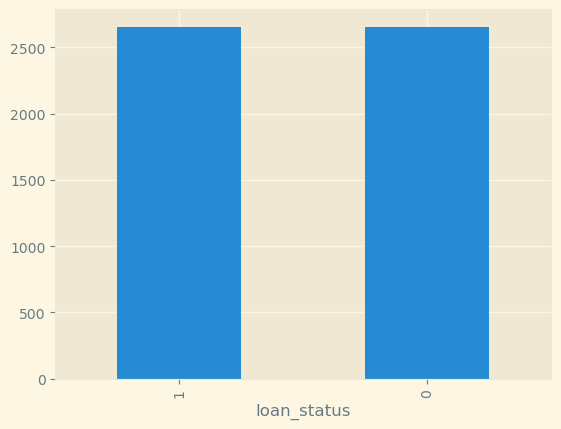

In [48]:
Y_resampled.value_counts().plot(
    kind = 'bar'
)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 42)

In [76]:
print(X_train.shape)
print(X_resampled.shape)

(4249, 11)
(5312, 11)


#### Training model

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train, y_train)

LogisticRegression()

In [123]:
y_pred = model.predict(X_test)

In [124]:
X_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1025,5,0,0,6100000,23600000,4,725,17400000,5100000,15600000,4800000
4006,5,0,0,5100000,13500000,20,840,1400000,5300000,14700000,4500000
2594,4,1,1,4600000,11900000,6,810,11200000,8200000,17500000,5200000
1817,4,1,1,9200000,25400000,14,765,21200000,6600000,25100000,5600000
1620,5,1,0,9500000,19200000,2,523,13500000,1500000,21000000,6700000
...,...,...,...,...,...,...,...,...,...,...,...
2287,2,0,0,200000,800000,6,338,100000,0,400000,100000
2944,0,0,0,2100000,8200000,4,554,3900000,3800000,5900000,1700000
122,1,0,0,8500000,32900000,10,570,5100000,6200000,20500000,5500000
2094,1,1,1,3300000,7500000,12,648,6400000,1700000,8700000,1600000


In [130]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [131]:
print(f'Accuracy:  {accuracy:.2f}  →  This means the model is {accuracy*100:.0f}% accurate.')
print(f'Precision: {precision:.2f}  →  This means the model is {precision*100:.0f}% precise.')
print(f'Recall:    {recall:.2f}  →  This means the model is {recall*100:.0f}% sensitive.')
print(f'F1 Score:  {f1:.2f}  →  This means the model has a {f1*100:.0f}% balanced performance.')

Accuracy:  0.54  →  This means the model is 54% accurate.
Precision: 0.51  →  This means the model is 51% precise.
Recall:    0.52  →  This means the model is 52% sensitive.
F1 Score:  0.52  →  This means the model has a 52% balanced performance.


### Implementing Random Forests

In [127]:
model_1 = RandomForestClassifier()

In [169]:
model_1.fit(X_train, y_train)

RandomForestClassifier()

In [170]:
y_pred_1 = model_1.predict(X_test)

In [171]:
accuracy = accuracy_score(y_test, y_pred_1)
precision = precision_score(y_test, y_pred_1)
recall = recall_score(y_test, y_pred_1)
f1 = f1_score(y_test, y_pred_1)

In [172]:
print(f'Accuracy:  {accuracy:.2f}  →  This means the model is {accuracy*100:.0f}% accurate.')
print(f'Precision: {precision:.2f}  →  This means the model is {precision*100:.0f}% precise.')
print(f'Recall:    {recall:.2f}  →  This means the model is {recall*100:.0f}% sensitive.')
print(f'F1 Score:  {f1:.2f}  →  This means the model has a {f1*100:.0f}% balanced performance.')

Accuracy:  0.98  →  This means the model is 98% accurate.
Precision: 0.97  →  This means the model is 97% precise.
Recall:    0.98  →  This means the model is 98% sensitive.
F1 Score:  0.98  →  This means the model has a 98% balanced performance.
